In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter

print("Start CIF downloading...")

with MPRester("kljjGo7W1D4tHy5OZy") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-567290")

    # Dos for material id
    dos = m.get_dos_by_material_id("mp-567290")

    # Bandstructure for material id
    bandstructure = m.get_bandstructure_by_material_id("mp-567290")

    CifWriter(structure,0.1,write_magmoms=False).write_file("LaN_mp-567290_symmetrized.cif")
    print("Downloading completed")

Start CIF downloading...


# Structure de bandes électroniques

La structure de bandes électroniques provenant du Materials Project est représentée à la figure 1. Il s'agit d'un diagramme de l’énergie des états (exprimés par rapport au niveau de Fermi) en fonction des différents vecteurs d’ondes. On distingue clairement la bande interdite qui correspond à la distance entre le point rouge (énergie minimale de la bande de conduction) et le vert (énergie maximale de la bande de valence). D'après Materials Project, cette distance correspond à une énergie de $1.119\hspace{1mm}eV$. Le $LaN$ est donc isolant électrique car l'énergie requise pour le franchissement d'un électron de la bande de valence vers la bande de conduction est supérieure à 1 eV. 

Étant donné que les points rouges et verts sont disposés à des valeurs de vecteur d'onde différentes, il s'agit d'un isolant à gap indirect. Le passage de la bande de valence à la bande de conduction est donc encore plus défavorisé.

La dernière bande de valence est notée (5 1) dans la figure interactive du Materials Project. Cette bande présente la dispersion d'énergie la plus grande dans la direction $\tau - A$ et la moins grande dans la direction $L - H$, comme représenté par les flèches rouges dans la figure 1.

La première bande de conduction est notée (6 1) dans la figure interactive du Materials Project. Cette bande présente la dispersion d'énergie la plus grande dans la direction $\tau - A$ et la moins grande dans la direction $M - K$, comme représenté par les flèches vertes dans la figure 1. 

## Figure 1

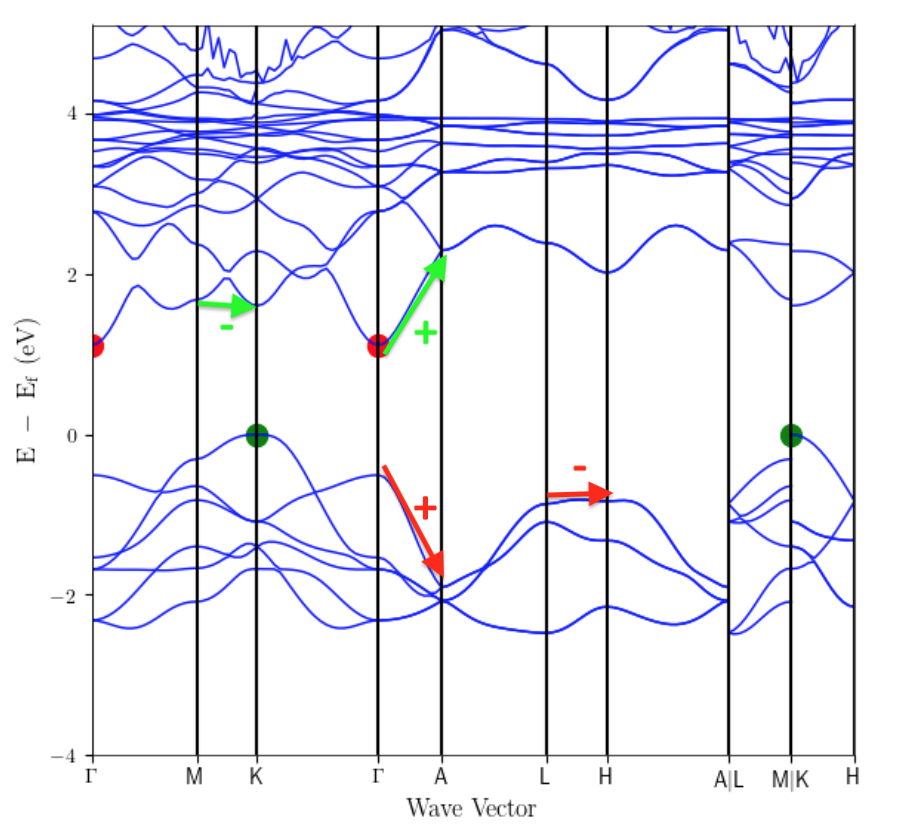

In [1]:
from IPython.display import Image
Image(filename="lmapr1492/elecgraph.png")

In [ ]:
# Code utilisé:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.bandstructure module import BandStructure

direct = m.get_band_gap() # On obtient un boolean permettant de savoir si le gap est direct ou pas. 
gap = m.get_direct_band_gap() # On obtient la valeur énergitique de la bande interdite 

# Conducteur: gap = 0 eV
# Semi-conducteur: 0 < gap <= 1 eV
# Isolant: gap > 1 eV

# Calcule de la masse effective d'un électron m*

La masse effective d'un électron est une masse adaptée par rapport à celle d'un éléctron libre $(9.11 x 10^{-31} kg)$ prenant en compte les forces dues aux interactions avec le milieu qui entoure l'éléctron. Elle est définie par le rapport entre la constante de Planck réduite au carré et la dérivée seconde de l'énergie $E$ en fonction du vecteur d'onde $k$:

$$ m^* = \frac{\bar{h}^2}{\frac{d^2E}{dk^2}}$$

Cette dérivée seconde correspond à la courbure de la bande. Comme nous supposons une dispersion parabolique, nous fonctionnons de la maniere suivante. Pour la bande de valence, nous interpolons trois points pour former notre parabole. Le point du milieu étant le sommet (maximum) de la bande de valence. Pour la bande de conduction, nous interpolons également trois points pour former notre parabole. Le point du milieu étant la base (minimum) de la bande de conduction.

Nous obtenons les masses effectives en évaluant, soit au sommet de la bande de valence soit à la base de la bande de conduction, la dérivée seconde de l'équation du second degré de chaque parabole. 

* Pour la bande de conduction on a $m^* = 23.45 x 10^{-31} kg$
* Pour la bande de valence on a $m^* = -8.98 x 10^{-31} kg$

Note: on a bien une masse effective négative au sommet de la bande de valence étant donné que la courbure de la parabole dans ce cas est négative. 


In [ ]:
# Code utilisé:
from pymatgen.electronic_structure.bandstructure module import BandStructure
maxval = m.get_vbm() # On obtient les coordonnées du sommet de la bande de valence
mincond = m.get_cbm() # On obtient les coordonnées de la base de la bande de conduction
from pymatgen.analysis.eos import PolynomialEOS([maxval(1),mincond(1)])
poly1 = fit(1)
from pymatgen.analysis.eos import PolynomialEOS([maxval(2),mincond(2)])
poly2 = fit(2)
Poly1 = polyval(poly1)
Poly2 = polyval(poly2)

## Références 

* Article scientifique de Simon Connell (2004-10-04) diponible à l'adresse : 
http://psi.phys.wits.ac.za/teaching/Connell/phys284/2005/lecture-07/lecture_07/node5.html

* S.Z. Sze, Physics of Semiconductor Devices;
* W.A. Harrison, Electronic Structure and the Properties of Solids;
* Site Moodle LMAPR1492 Glossaire + link ALFLOW CrystalDatabase http://aflow.org/CrystalDatabase/space_groups.html